In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils_nav import ProgramGenerator, ProgramInterpreter
from prompts.gqa import create_prompt

/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load random starting point

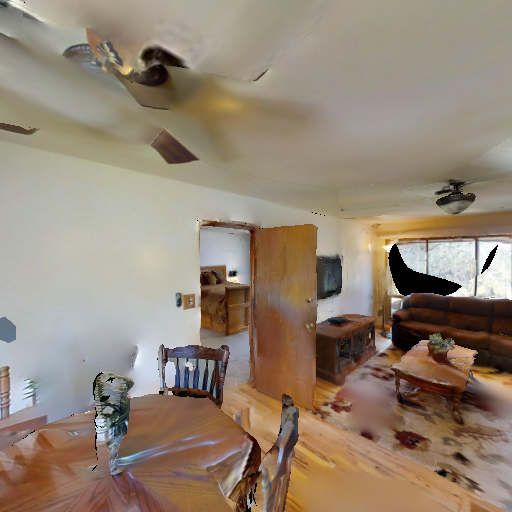

In [3]:
# random image to show where the agent should start
image = Image.open('../assets/startnav.png')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [7]:
# question examples are shown in the folder prompts/pointnav.py
question = """go to the sink, then navigate 3 meters on the left"""
answer= """while not STOP0:
    NAV0=NAVIGATE(image=IMAGE, goal='sink')
    LOC0=LOCATE(pos=NAV0)
    EVAL0=EVAL(expr="'STOP' if {LOC0} else 'NAVIGATE'")
    STOP0=STOP(var=EVAL0)
while not STOP1:
    NAV1=NAVIGATE(image=IMAGE, goal='[0,0,-3]')
    LOC1=LOCATE(pos=NAV1)
    EVAL1=EVAL(expr="'STOP' if {LOC1} else 'NAVIGATE'")
    STOP1=STOP(var=EVAL1)
"""

### Four pointnav classes
- NAVIGATE = uses the pretrained pointnav navigator to reach the goal
- LOCATE = locates the agent in the space and returns the distance to the goal
- EVAL = Evaluates if the agent has to keep navigating or it stops. It stops when its less than a certain threshold from the goal
    - ideally if the agent does not reach the goal, it keeps navigating from the current position
- STOP = returns True if the agent reaches the goal, else returns False
    - when stop returns False, the program loops over the previous steps for a maximum of 4 iterations

In [9]:
prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter, debug=True)

interpreter = ProgramInterpreter(dataset='pointnav')
prog,_ = generator.generate(dict(question=question), answer) #fake answer

Registering NAVIGATE step
Registering STOP step
Registering LOCATE step
Registering EVAL step


### Pointnav example
- The *dist_to_goal* values are random, just to show the behaviour of the agent. The threshold is set to 0.5meters
- *Trial* is referred to the number of times the agent didn't reach the goal and kept navigating 

In [10]:
result, prog_state, html_str = interpreter.execute(prog,\
                                        init_state,\
                                        inspect=True)
result

-------------
| Trial n°1 |
-------------
NAVIGATE
LOCATE
EVAL
STOP
-------------
| Trial n°1 |
-------------
NAVIGATE
LOCATE
EVAL
STOP
-------------
| Trial n°2 |
-------------
NAVIGATE
LOCATE
EVAL
STOP


True

Question: go to the sink, then navigate 3 meters on the left
Steps: 
 while not STOP0:
    NAV0=NAVIGATE(image=IMAGE, goal='sink')
    LOC0=LOCATE(pos=NAV0)
    EVAL0=EVAL(expr="'STOP' if {LOC0} else 'NAVIGATE'")
    STOP0=STOP(var=EVAL0)
while not STOP1:
    NAV1=NAVIGATE(image=IMAGE, goal='[0,0,-3]')
    LOC1=LOCATE(pos=NAV1)
    EVAL1=EVAL(expr="'STOP' if {LOC1} else 'NAVIGATE'")
    STOP1=STOP(var=EVAL1)




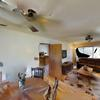
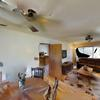
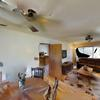

In [11]:
print('Question:',question)
print('Steps: \n',answer)
HTML(html_str)